In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
# given some p, and some tensor of probabilities that pitchers and batters at some point 
# attempt a strike or swing respectively, dp that shit and get q for the state b = 0, s = 0.

def getQ(xtable, p):
    # at state b , s,
    # f_{B , S} (b , s) = 
    #   P(b, s + 1) =  x^2(1 - p) + 2x(1-x)
    #   P(b + 1, s) = (1 - x)^2
    #   P(HR) = px^2


    qtable = np.zeros((5 , 4))
    # initiate probability at b = 4 and s = 3 to 0.
    
    
    for balls in range(4 , -1, -1):
        for strikes in range(3 , -1, -1): 
            
            if balls == 4 or strikes == 3:
                qtable[balls][strikes] = 0.0

            elif balls == 3 and strikes == 2:
                qtable[balls][strikes] = 1.0 # makes sense

            else:

                pnextStrike = qtable[balls][strikes + 1]
                pnextBall = qtable[balls + 1][strikes]


                x = xtable[balls][strikes]

                a = (x**2)*(1 - p) + 2*x*(1-x) # derived theoretically.
                b = (1 - x)**2

                qtable[balls][strikes] = a * pnextStrike + b*pnextBall

    return qtable[0][0] 




# Visualization helper, not important. AI generated.

In [131]:
from rich.console import Console
from rich.table import Table

console = Console()

def print_colored_tables(evtable, xtable, b, s, nextBall=None, nextStrike=None):
    """Print evtable and xtable with colored highlighting for current and next states"""
    
    console.print("\n[bold cyan]EV Table:[/bold cyan]")
    ev_table = Table(show_header=True, header_style="bold magenta")
    ev_table.add_column("B\\S", style="dim", width=6)
    for s_col in range(4):
        ev_table.add_column(f"S={s_col}", justify="right", width=10)
    
    for b_row in range(5):
        row_data = [f"{b_row}"]
        for s_col in range(4):
            val = f"{evtable[b_row][s_col]:.4f}"
            
            # Color current node blue
            if b_row == b and s_col == s:
                val = f"[bold blue]{val}[/bold blue]"
            # Color next ball yellow
            elif nextBall is not None and b_row == b + 1 and s_col == s:
                val = f"[bold yellow]{val}[/bold yellow]"
            # Color next strike yellow
            elif nextStrike is not None and b_row == b and s_col == s + 1:
                val = f"[bold yellow]{val}[/bold yellow]"
            
            row_data.append(val)
        ev_table.add_row(*row_data)
    
    console.print(ev_table)
    
    console.print("\n[bold cyan]kX Table (Swing Probabilities):[/bold cyan]")
    x_table = Table(show_header=True, header_style="bold magenta")
    x_table.add_column("B\\S", style="dim", width=6)
    for s_col in range(4):
        x_table.add_column(f"S={s_col}", justify="right", width=10)
    
    for b_row in range(5):
        row_data = [f"{b_row}"]
        for s_col in range(4):
            val = f"{xtable[b_row][s_col]:.4f}"
            
            # Color current node blue
            if b_row == b and s_col == s:
                val = f"[bold blue]{val}[/bold blue]"
            
            row_data.append(val)
        x_table.add_row(*row_data)
    
    console.print(x_table)

DP - 

Literally what it says
Iterate from the base cases all the way back to 0,0 to get the expected value

In [132]:

debug = False

def dp(p):

    evtable = np.zeros((5 , 4))
    xtable = np.zeros((5, 4))
    
    if debug == True:
        print("-" * 30)

        print("p: ", p)


    for b in range(4 , -1, -1):
        if debug == True:
            print("-" * 20)
            print("b: ", b)
        for s in range(3 , -1, -1): 
            
            if debug == True:
                print("-" * 10)
                print("s: ", s)
                
                nextBall = None
                nextStrike = None
            
            
            

            if b == 4 and s == 3:
                if debug == True:
                    print("Unreachable node...")
                continue
            elif b == 4:
                evtable[b][s] = 1
            elif s == 3:
                evtable[b][s] = 0
            else:

                nextBall = evtable[b + 1][s]
                nextStrike = evtable[b][s + 1]
                
                denom = nextBall + 4 * p - nextStrike * (1 + p)
                
                if abs(denom) < 1e-10:
                    # Handle degenerate case (e.g., all payoffs equal, V = nextBall or 0)
                    y = 0.0  # Or compute minimax with pure strategies
                else:
                    y = (nextBall - nextStrike) / denom
                x = y
                
                if debug == True:
                    print(f"  DEBUG: b={b}, s={s}, \nnextBall={nextBall:.4f}, nextStrike={nextStrike:.4f}, \nx={x:.4f}, y={y:.4f}.")
                    print("Div by zero? Denom of y = ", 2 * nextStrike - nextBall + 4*p )

                evtable[b][s] = ((1 - x)**2) * nextBall + 2 * x * (1 - x) * nextStrike + (x**2)*(4*p + (1 - p)*nextStrike) 
                xtable[b][s] = x
                
            if debug == True:
                if nextBall is not None and nextStrike is not None:
                    print_colored_tables(evtable, xtable, b, s, nextBall, nextStrike)
                else:
                    print_colored_tables(evtable, xtable, b, s)

    q = getQ(xtable, p)

    return q

In [133]:
def log(EV, X, p, b, s) -> None:
    with open(f"runs/log_p={p},b={b},s={s}.txt", "w") as file:
        file.write(f"EV: {EV}\n")
        file.write(f"X: {X}\n")
        file.write(f"p: {p}\n")
        file.write(f"b: {b}\n")
        file.write(f"s: {s}\n")


### Cool: Make your own optimizer! Super inefficient. Does include intermediary graphing.

Finalized. Log of run is as follows: 
{'Iteration 9': {'p': np.float64(0.22737748480000003), 'q': np.float64(0.2959675552176426), 'l': np.float64(0.22447731200000004), 'h': np.float64(0.22882757120000002)}}
qbest = 0.2959675552176426
pbest = 0.22737748480000003


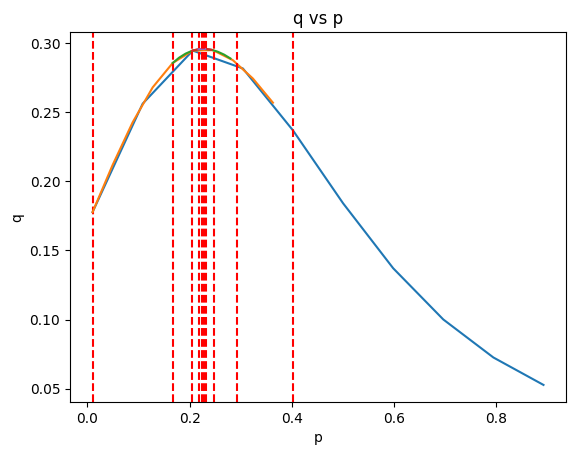

In [142]:


# got q = 0.295967993374272
# imax = 0
# prange[imax] = 0.22697322707738274

counter = 0

def main():
    


    log = {}

    """
    try: 
        iterations = int(sys.argv[1])
    except Exception as e:
        iterations = 1
        raise e


    """
    iterations = 5
    l , h = 0.01 , 0.99

    qvals = np.zeros(10)

    for i in range(iterations): 
        

        # build new range for prange

        prange = np.arange(l, h, (h - l) / 10.0)
        # print(prange)

        for i , pval in enumerate(prange):
            
            if debug:
                print(f"entered p in [{l}, {h}] loop")
                
            qvals[i] = dp(pval)

            if debug:
                print(f"got q = {qvals[i]}")
            

        
        global counter

        imax = np.argmax(qvals)
        
        if debug:
            print(f"imax = {imax}")
            print(f"prange[imax] = {prange[imax]}")
        
        # zoom in
        l = prange[imax] - 1 * abs((l - h) / 5.0)
        h = prange[imax] + 1 * abs((l - h) / 5.0)


        log[f"Iteration {i}"] = { "p": prange[imax], "q": qvals[imax] , "l": l, "h": h}        
        
        plt.plot(prange, qvals)
        plt.xlabel("p")
        plt.ylabel("q")
        plt.title("q vs p")
        plt.axvline(l, color='r', linestyle='--')
        plt.axvline(h, color='r', linestyle='--')
        plt.savefig(f"runs/{counter}.png", dpi=300)
        # plt.show()
        
        counter += 1
        
    


    print("Finalized. Log of run is as follows: ")
    print(log)
    print(f"qbest = {qvals[imax]}")
    print(f"pbest = {prange[imax]}")


if __name__ == "__main__":
    main()

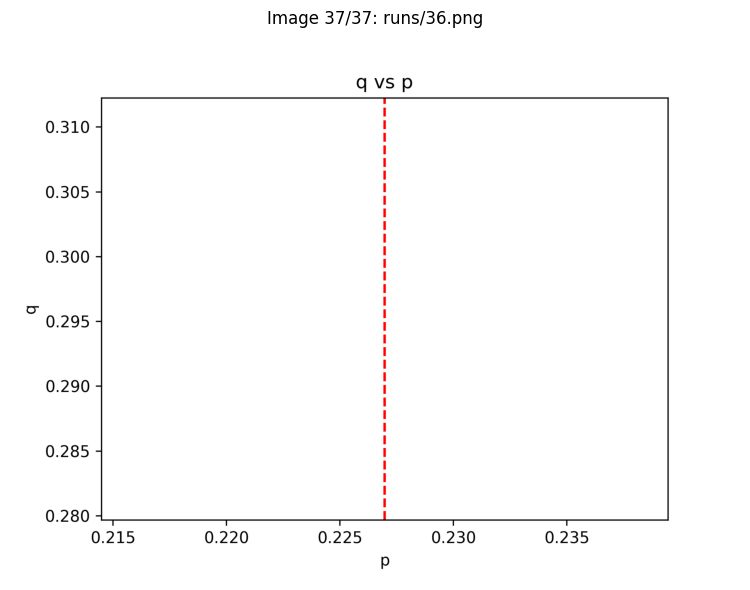

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import os

all_images = [f"runs/{f}" for f in os.listdir("runs") if f.endswith('.png')]

# Sort by numeric filename (e.g., runs/12.png -> 12)
all_images.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

for i, image in enumerate(all_images):
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.imshow(plt.imread(image))
    plt.axis('off')
    plt.title(f"Image {i+1}/{len(all_images)}: {image}")
    plt.tight_layout()
    plt.show()
    time.sleep(0.2)
    plt.close()

In [ ]:
# The more boring way.
from scipy.optimize import minimize_scalar

def objective(p):
    return -dp(p)  # Negative because using minimize_scalar, want to max

result = minimize_scalar(objective, bounds=(0.00, 1), method='bounded', 
                        options={'xatol': 1e-12})

optimal_p = result.x
best_q = -result.fun

print(f"Optimal p = {optimal_p:.10f}")
print(f"Optimal q = {best_q:.10f}")


# got q = 0.295967993374272
# imax = 0
# prange[imax] = 0.22697322{707738274} deviation of true val at {1e-8}

Optimal p = 0.2269732358
Optimal q = 0.2959679934


In [ ]:
Doneso